In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model, run_distance_based_model, test_distance_based_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/quercetin_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,NO_Que
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,NO_Que
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,NO_Que
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,NO_Que
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,NO_Que


In [4]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


# Tree based algorithms

In [5]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [7]:
dtc = DecisionTreeClassifier(max_depth=30, min_samples_leaf=60, max_leaf_nodes=35)

 CV Scores: [0.68504673 0.67803738 0.67009346 0.67943925]
 CV Mean score: 0.6781542056074766


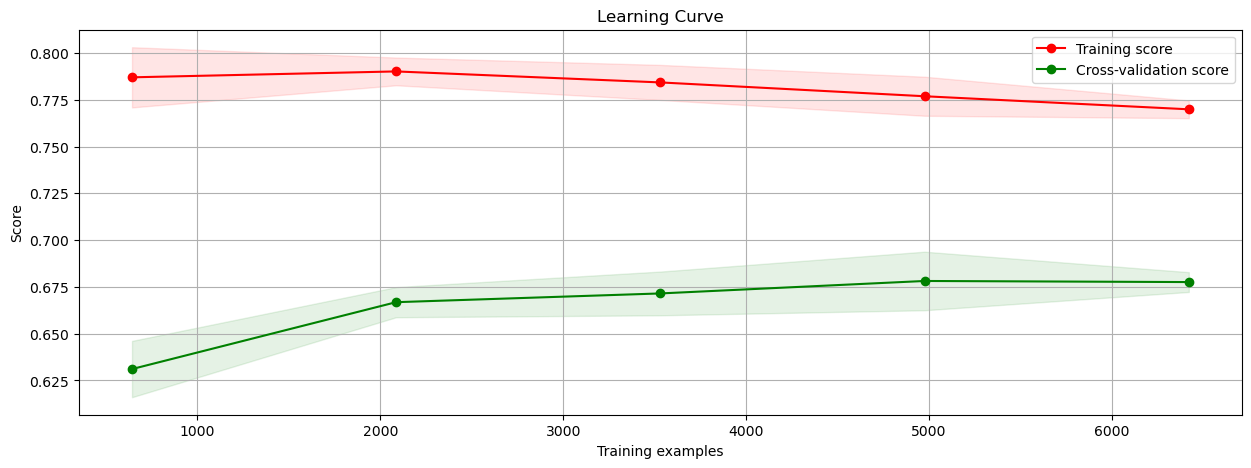

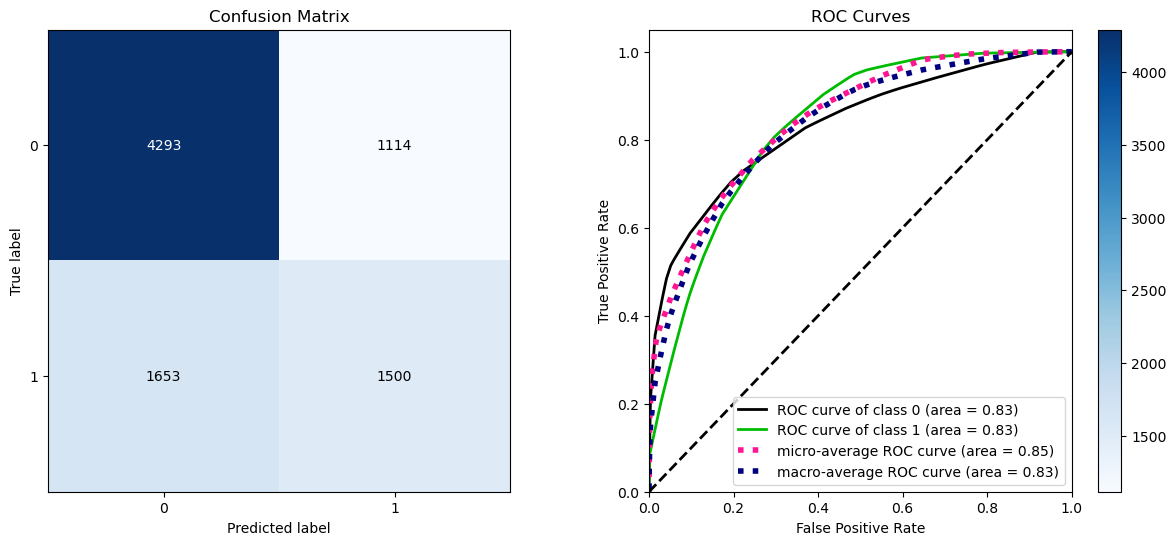

In [8]:
run_model(dtc, X_train, y_train)

In [9]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, max_leaf_nodes=35, min_samples_leaf=60)

In [10]:
dtc_pred = dtc.predict(X_test)

In [11]:
f1_score(y_test, dtc_pred)

0.5492577597840755

In [12]:
accuracy_score(y_test, dtc_pred)

0.6878504672897197

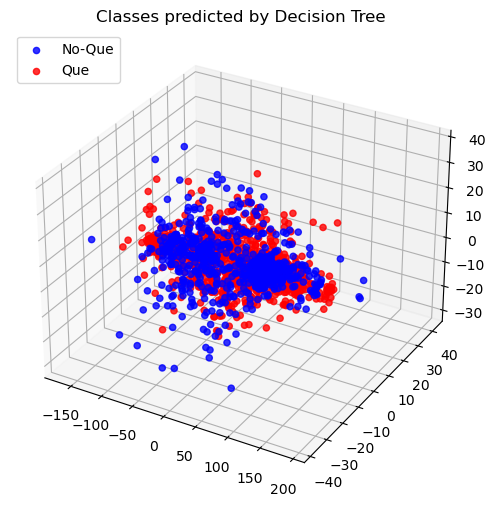

In [13]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree")

## Random Forest Classifer

In [14]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=30, 
                             max_leaf_nodes=35, min_samples_leaf=60)

 CV Scores: [0.74485981 0.75280374 0.73224299 0.7364486 ]
 CV Mean score: 0.741588785046729


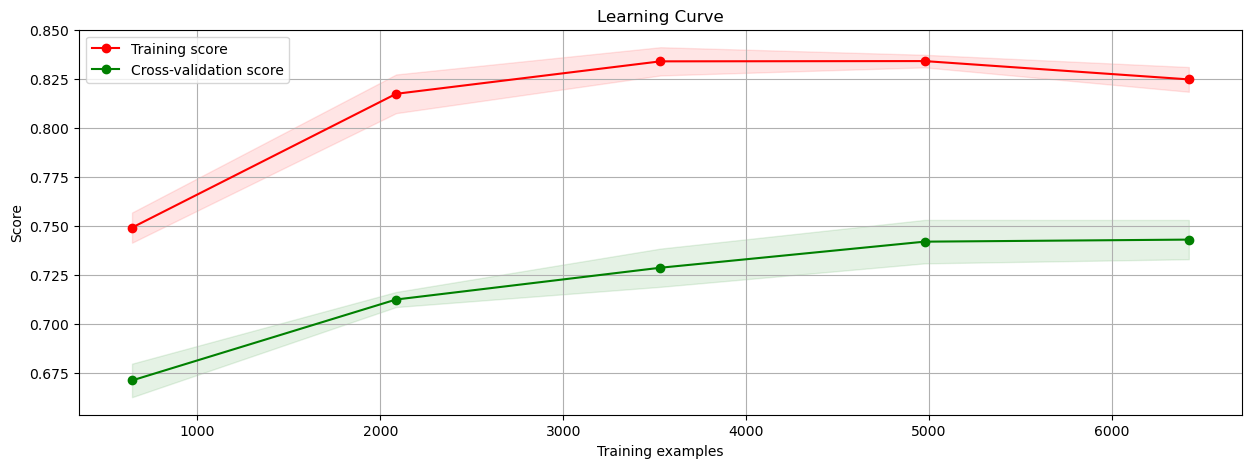

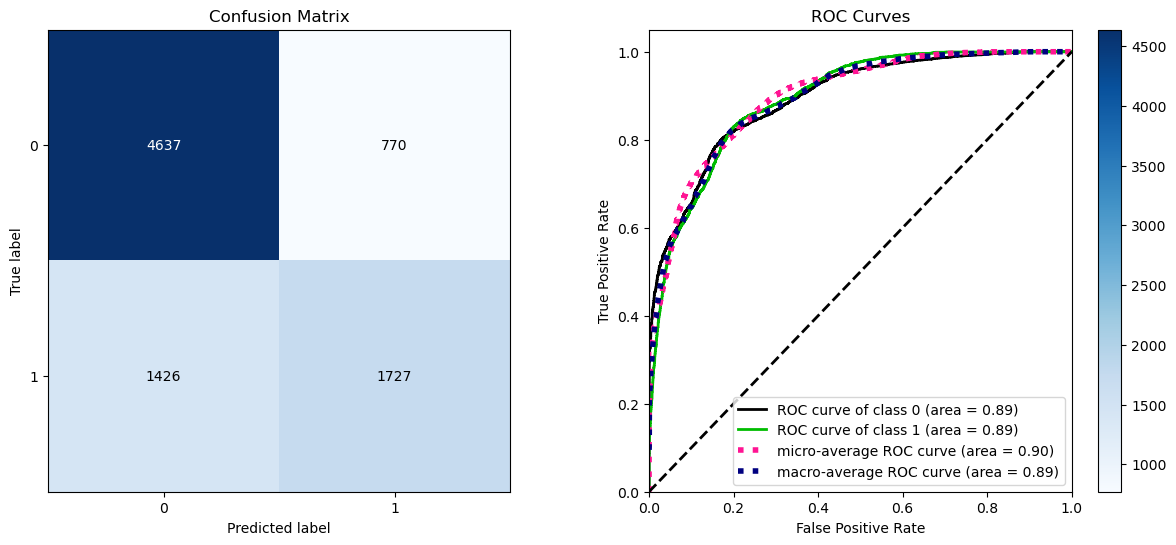

In [15]:
run_model(rfc, X_train, y_train)

In [16]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_leaf_nodes=35, min_samples_leaf=60,
                       n_estimators=200)

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
f1_score(y_test, rfc_pred)

0.5983906364301389

In [19]:
accuracy_score(y_test, rfc_pred)

0.7434579439252337

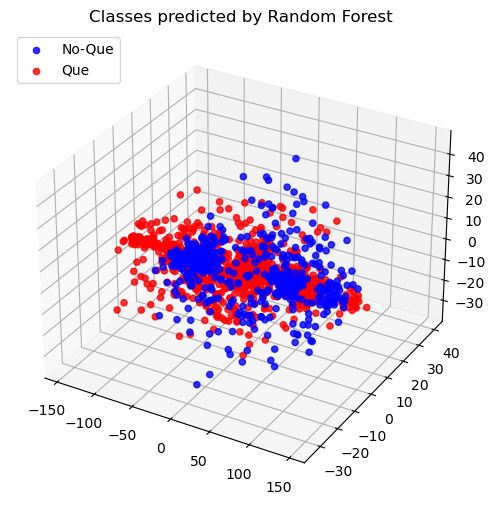

In [20]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest")

## XGBoost Classifier

In [21]:
xgb = XGBClassifier(n_estimators=25, max_depth=3)

 CV Scores: [0.71308411 0.71495327 0.70654206 0.70747664]
 CV Mean score: 0.7105140186915888


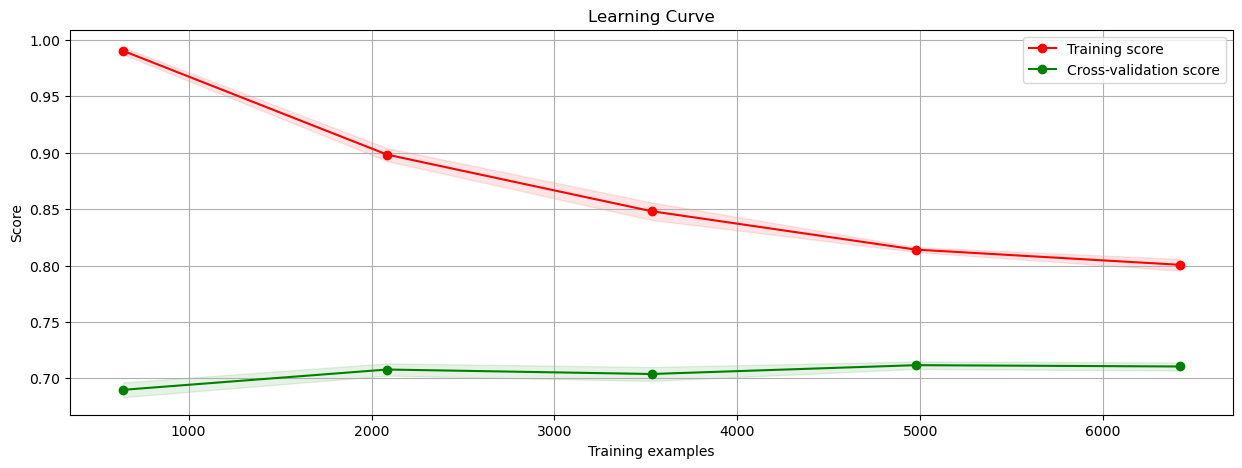

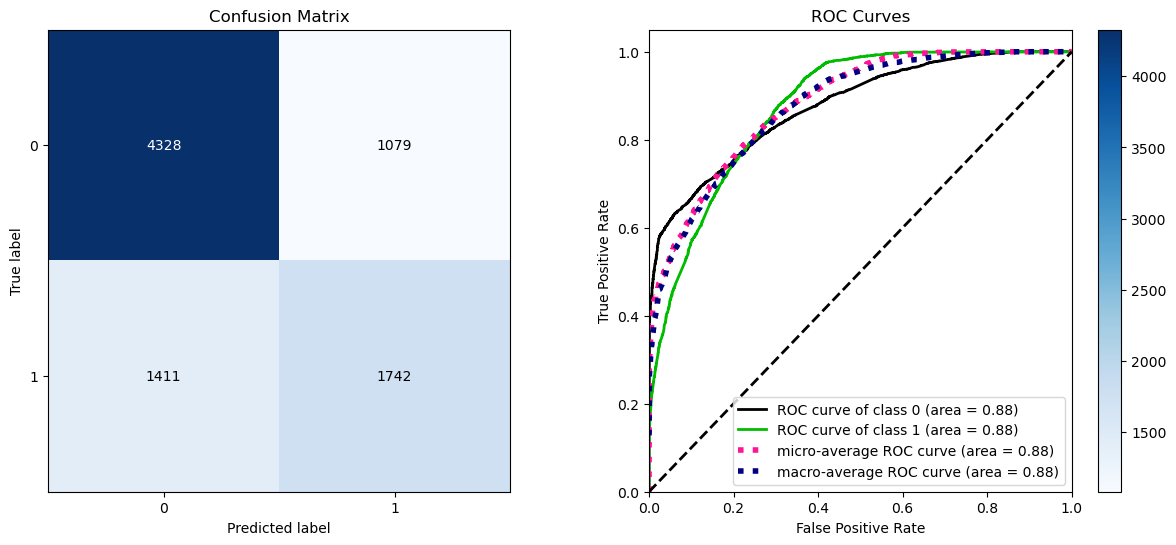

In [22]:
run_model(xgb, X_train, y_train)

In [23]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
xgb_pred = xgb.predict(X_test)

In [25]:
f1_score(y_test, xgb_pred)

0.579750346740638

In [26]:
accuracy_score(y_test, xgb_pred)

0.7168224299065421

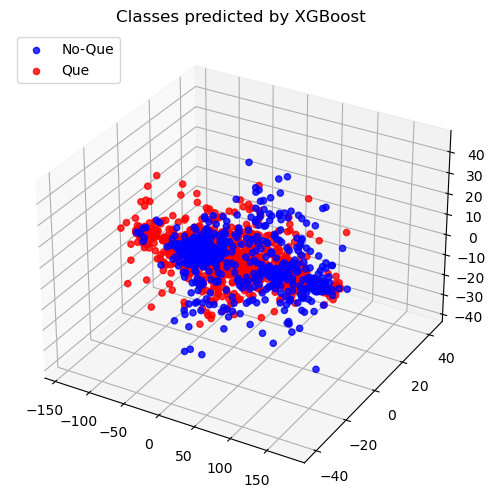

In [27]:
draw_classes_scatterplot(X_test, xgb_pred, "Classes predicted by XGBoost")

## Light GBM Classifier

In [28]:
lgbm = LGBMClassifier(n_estimators=100, max_depth=3, min_child_samples=100)

 CV Scores: [0.72943925 0.73037383 0.7182243  0.72523364]
 CV Mean score: 0.7258177570093458


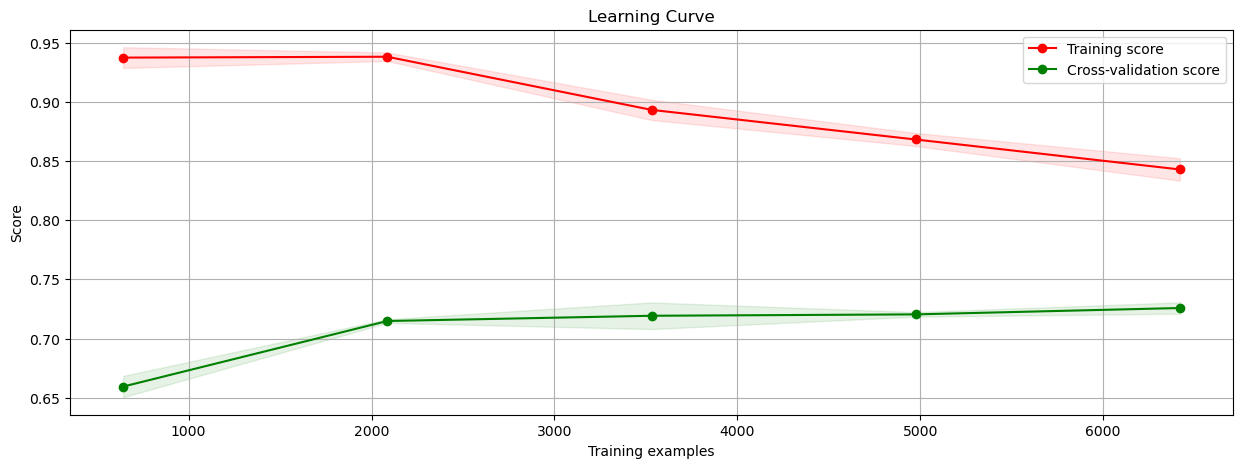

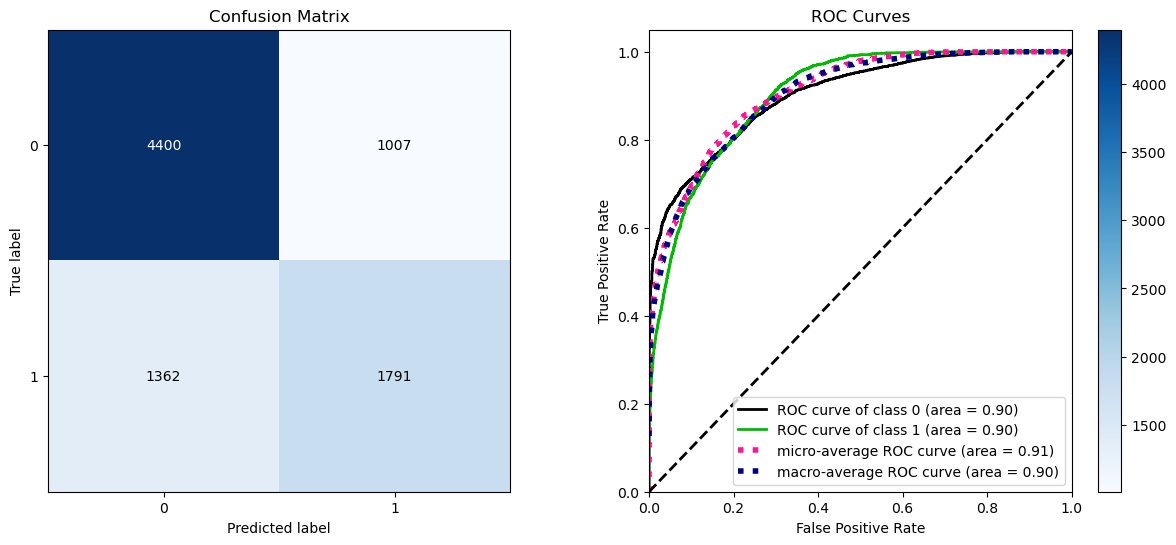

In [29]:
run_model(lgbm, X_train, y_train)

In [30]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=100)

In [31]:
lgbm_pred = lgbm.predict(X_test)

In [32]:
f1_score(y_test, lgbm_pred, average='weighted')

0.736501986890298

In [33]:
accuracy_score(y_test, lgbm_pred)

0.7401869158878505

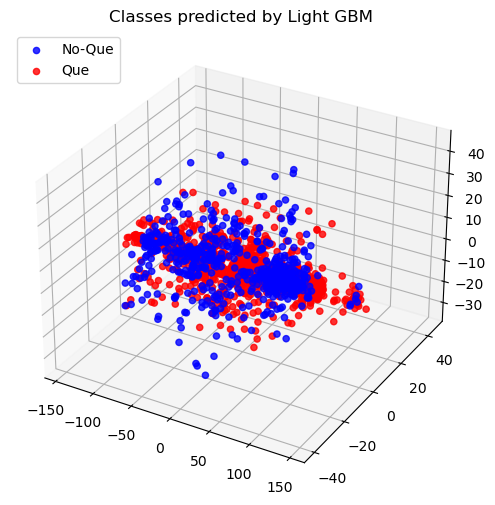

In [34]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM")

## Time Series Forest Classifier

In [35]:
tsf = TimeSeriesForest(n_estimators=150, max_depth=30, min_samples_leaf=80)

 CV Scores: [0.79065421 0.7817757  0.75514019 0.77383178]
 CV Mean score: 0.7753504672897197


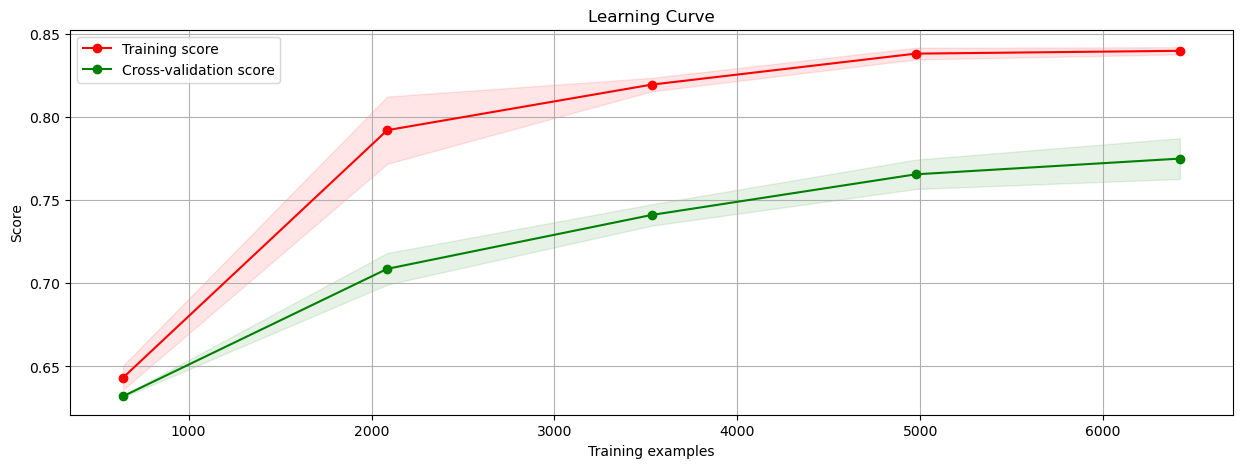

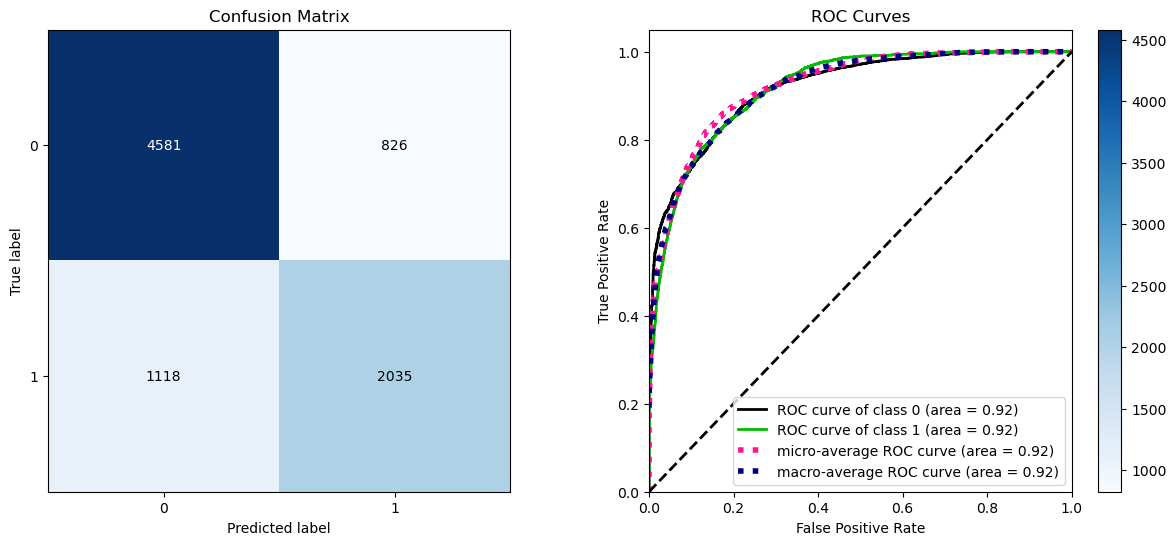

In [36]:
run_model(tsf, X_train, y_train)

In [37]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=30, min_samples_leaf=80, n_estimators=150)

In [38]:
tsf_pred = tsf.predict(X_test)

In [39]:
f1_score(y_test, tsf_pred)

0.6991758241758241

In [40]:
accuracy_score(y_test, tsf_pred)

0.7953271028037383

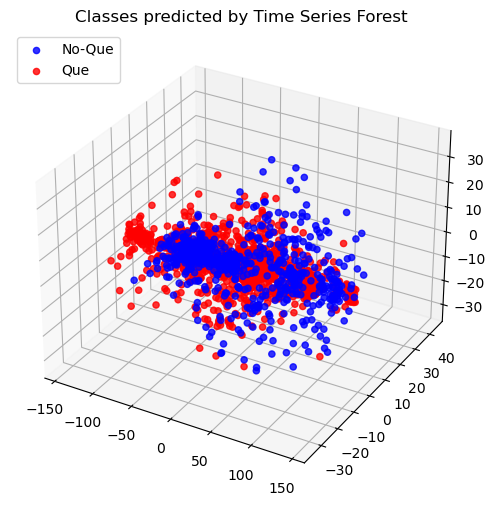

In [41]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest")

## TSBF

In [42]:
tsbf = TSBF(n_estimators=100, max_depth=30, min_samples_leaf=65, max_leaf_nodes=45)

 CV Scores: [0.77616822 0.76401869 0.74579439 0.75560748]
 CV Mean score: 0.7603971962616822


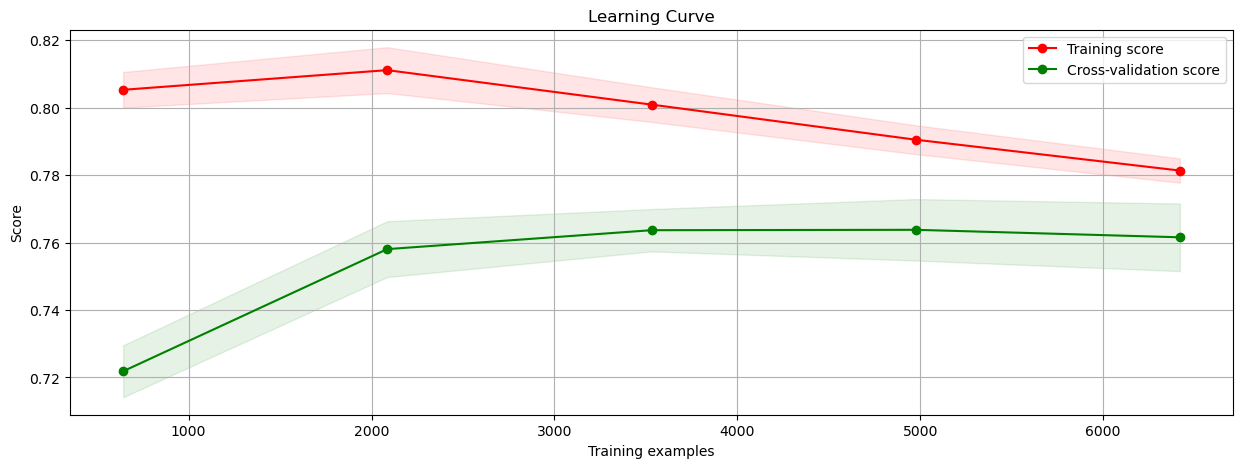

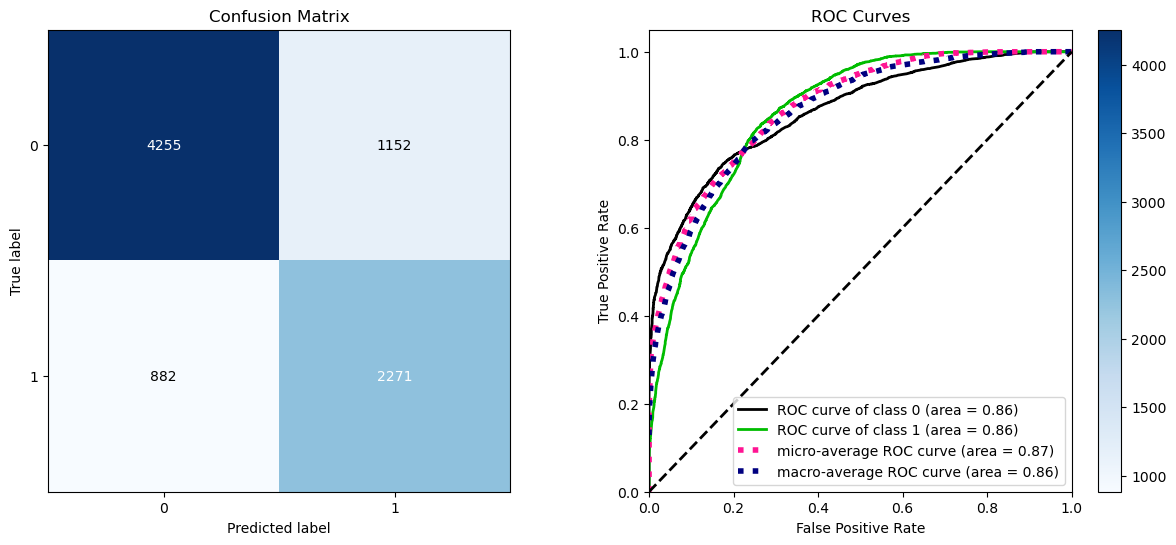

In [43]:
run_model(tsbf, X_train, y_train)

In [44]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=30, max_leaf_nodes=45, min_samples_leaf=65, n_estimators=100)

In [45]:
tsbf_pred = tsbf.predict(X_test)

In [46]:
f1_score(y_test, tsbf_pred, average='weighted')

0.7707891807186369

In [47]:
accuracy_score(y_test, tsbf_pred)

0.766822429906542

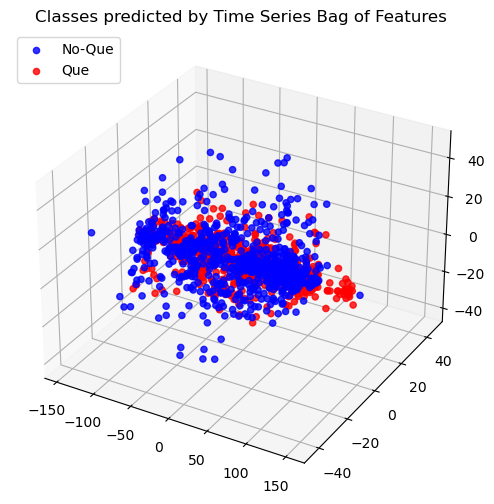

In [48]:
draw_classes_scatterplot(X_test, tsbf_pred, "Classes predicted by Time Series Bag of Features")

# Distance-based algorithms

In [49]:
scaler = MinMaxScaler()

In [50]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.183309,0.186687,0.187205,0.183287,0.188252,0.184973,0.174496,0.188504,0.190634,0.203206,...,0.194373,0.195839,0.190456,0.199567,0.193027,0.187649,0.203624,0.210831,0.207732,0.0
1,0.183646,0.187646,0.198571,0.197868,0.199897,0.200085,0.192764,0.169504,0.173372,0.189272,...,0.185014,0.199640,0.187640,0.178430,0.182275,0.185154,0.188761,0.183722,0.190034,0.0
2,0.189681,0.192051,0.183463,0.177313,0.194576,0.190043,0.183346,0.179033,0.183315,0.194051,...,0.199103,0.196825,0.185138,0.184136,0.194018,0.178255,0.183716,0.180937,0.193473,0.0
3,0.189067,0.185807,0.178442,0.176699,0.187057,0.196038,0.189973,0.191418,0.196137,0.205805,...,0.197247,0.196530,0.200289,0.198366,0.182949,0.174815,0.200836,0.214944,0.215251,0.0
4,0.197318,0.192716,0.206510,0.210592,0.211895,0.210208,0.198802,0.203484,0.191997,0.197579,...,0.199769,0.192767,0.185808,0.180070,0.172197,0.181125,0.202123,0.187214,0.195688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,0.618932,0.581351,0.563241,0.586632,0.609258,0.629958,0.617188,0.603182,0.592333,0.601589,...,0.584001,0.595904,0.609518,0.602886,0.593608,0.599745,0.608724,0.586029,0.580810,1.0
10696,0.587971,0.584231,0.603014,0.603788,0.587329,0.570904,0.582958,0.596586,0.597195,0.595623,...,0.446501,0.538600,0.587511,0.596001,0.602542,0.591631,0.618287,0.602616,0.605737,1.0
10697,0.545930,0.545770,0.581330,0.592137,0.565086,0.575053,0.597176,0.599501,0.593418,0.610593,...,0.379344,0.388628,0.399362,0.394286,0.396017,0.386942,0.371665,0.370686,0.394744,1.0
10698,0.390564,0.376394,0.370544,0.370603,0.394877,0.396192,0.387081,0.412851,0.393133,0.390236,...,0.600128,0.599556,0.576916,0.598651,0.616290,0.632641,0.643110,0.606794,0.592804,1.0


In [51]:
X_distance_based, y_distance_based = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [52]:
X_train_db, X_test_db, y_train_db, y_test_db = train_test_split(X_distance_based, 
                                                    y_distance_based, test_size=0.2, random_state=42)

## k-Nearest Neighbors

In [53]:
knn = KNeighborsClassifier()

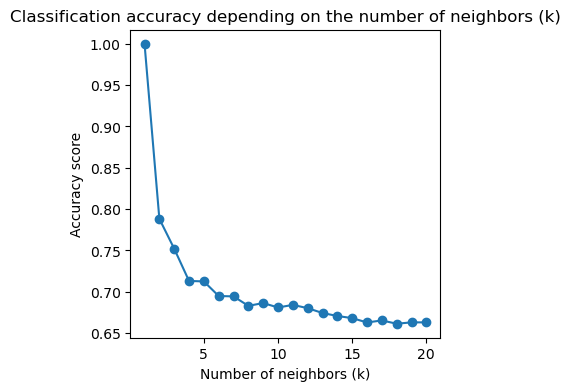

In [54]:
run_distance_based_model(knn, X_train_db, y_train_db)

 CV Scores: [0.63457944 0.64485981 0.63785047 0.63785047]
 CV Mean score: 0.638785046728972


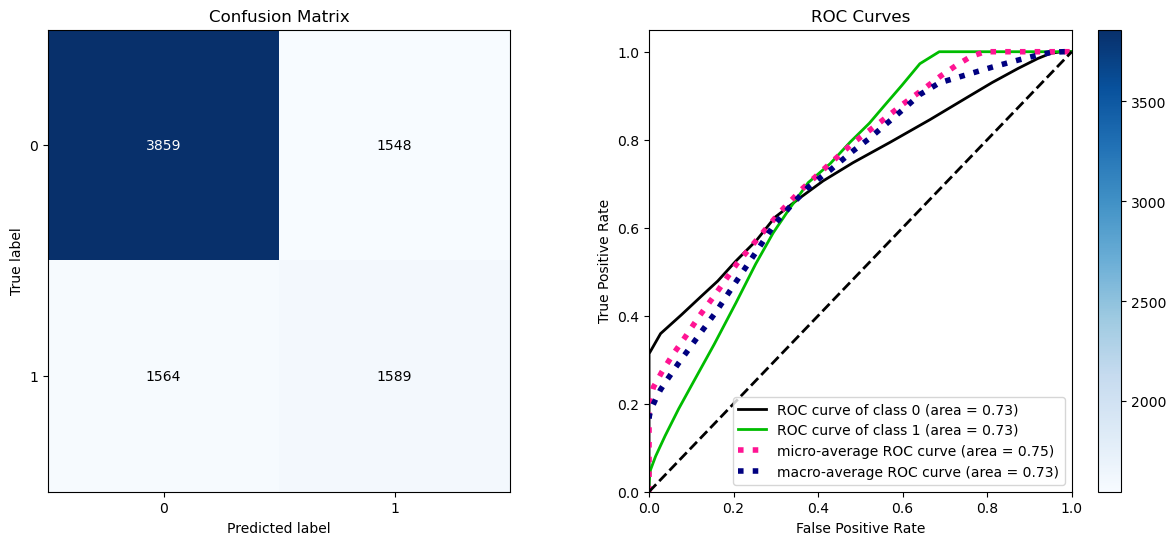

In [55]:
test_distance_based_model(knn, X_train_db, y_train_db)

In [56]:
knn.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [57]:
knn.fit(X_train_db, y_train_db)

KNeighborsClassifier(n_neighbors=3)

In [58]:
knn_pred = knn.predict(X_test_db)

In [59]:
f1_score(knn_pred, y_test)

0.4332603938730854

In [60]:
accuracy_score(knn_pred, y_test)

0.6369158878504673

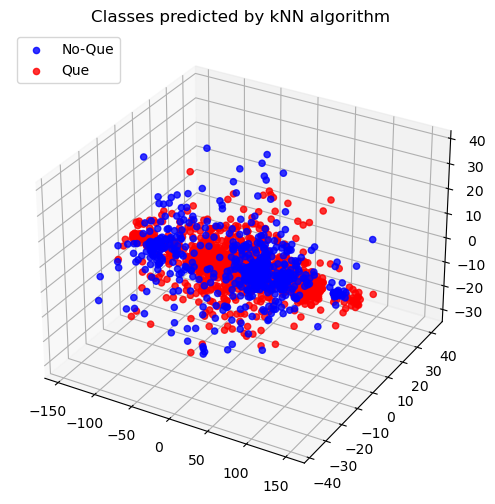

In [61]:
draw_classes_scatterplot(X_test, knn_pred, "Classes predicted by kNN algorithm")

## k-Nearest Neighbors with Dynamic Time Warping

In [63]:
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, distance="dtw")

In [ ]:
knn_dtw.fit(X_train_db, y_train_db)

In [ ]:
knn_dtw_pred = knn_dtw.predict(X_test_db)

In [ ]:
f1_score(knn_dtw_pred, y_test)

In [ ]:
accuracy_score(knn_dtw_pred, y_test)

In [ ]:
draw_classes_scatterplot(X_test, knn_dtw_pred, "Classes predicted by kNN + DTW algorithm")